In [1]:
import sys
import sklearn
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

np.random.seed(49)
tf.random.set_seed(49)
from sklearn.datasets import load_files 
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
#get dataset
!wget https://github.com/wdefine/4774project/blob/master/garbage-classification.zip?raw=true
!cp 'garbage-classification.zip?raw=true' 'garbage-classification.zip'
!unzip "garbage-classification.zip"

--2020-04-26 14:08:50--  https://github.com/wdefine/4774project/blob/master/garbage-classification.zip?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/wdefine/4774project/raw/master/garbage-classification.zip [following]
--2020-04-26 14:08:51--  https://github.com/wdefine/4774project/raw/master/garbage-classification.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/wdefine/4774project/master/garbage-classification.zip [following]
--2020-04-26 14:08:51--  https://raw.githubusercontent.com/wdefine/4774project/master/garbage-classification.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.

In [0]:
#load dataset 
# define function to load train, test, and validation datasets
def load_dataset(path, num_classes):
    #Load text files with categories as subfolder names.
    data = load_files(path)
    filenames = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']), num_classes)
    return filenames, targets

n_classes = 6;
# Make sure you create the class names that match the order of their appearances in the "files" variable
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


files, targets = load_dataset('garbage-classification/',n_classes)

In [0]:
#split dataset all => test/train
train_files, test_files, train_targets, test_targets = train_test_split(files, targets, test_size=0.2, random_state=49)
#split dataset train => train/val
train_files, val_files, train_targets, val_targets = train_test_split(train_files, train_targets, test_size=0.2, random_state=49)

In [5]:
from keras.preprocessing import image
from tqdm import tqdm # progress bar

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)           

# pre-process the data for Keras - Converts to (224, 224) and converts into a numpy array using PIL.
# NOTE: This code does not include any data augmentation, but you can modify it to include the augmentation operation.
X_train = paths_to_tensor(train_files).astype('float32')/255
X_val = paths_to_tensor(val_files).astype('float32')/255
X_test = paths_to_tensor(test_files).astype('float32')/255
# Convert y_targets into labels
y_train = np.asarray([np.where(r==1)[0][0] for r in train_targets], dtype=np.uint8)
y_test = np.asarray([np.where(r==1)[0][0] for r in test_targets], dtype=np.uint8)
y_val = np.asarray([np.where(r==1)[0][0] for r in val_targets], dtype=np.uint8)

100%|██████████| 506/506 [00:01<00:00, 254.40it/s]


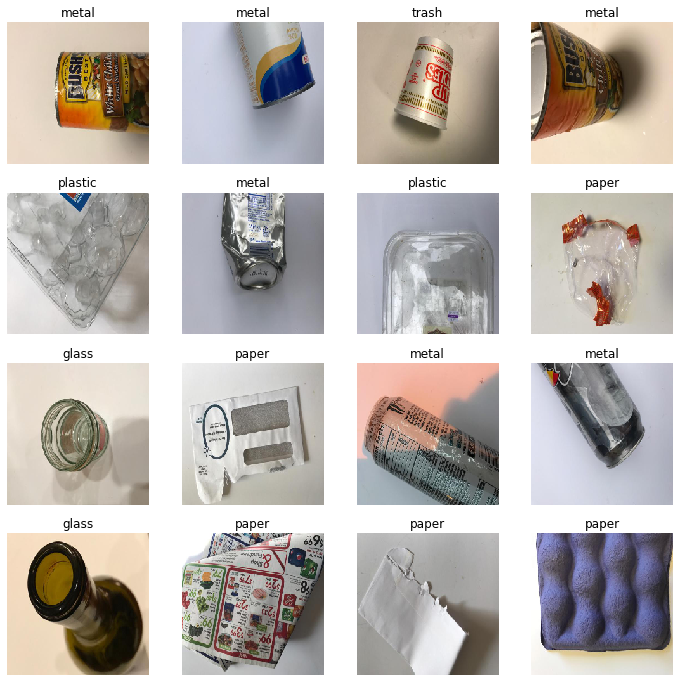

In [6]:
# Visualize some of the train samples
n_rows = 4
n_cols = 4
plt.figure(figsize=(n_cols * 3, n_rows * 3))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=.2, hspace=.2)

In [0]:
# YOUR CODE STARTS HERE